In [1]:
!nvidia-smi

Wed Apr 25 10:42:16 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  On   | 00000000:02:00.0 Off |                    0 |
| N/A   33C    P0    30W / 250W |    381MiB / 12193MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P100-PCIE...  On   | 00000000:03:00.0 Off |                    0 |
| N/A   33C    P0    29W / 250W |    381MiB / 12193MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [2]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11055841269313337019
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11481343591
locality {
  bus_id: 1
}
incarnation: 2421872735706630528
physical_device_desc: "device: 0, name: Tesla P100-PCIE-12GB, pci bus id: 0000:02:00.0, compute capability: 6.0"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 11481343591
locality {
  bus_id: 1
}
incarnation: 4435541294371284245
physical_device_desc: "device: 1, name: Tesla P100-PCIE-12GB, pci bus id: 0000:03:00.0, compute capability: 6.0"
, name: "/device:GPU:2"
device_type: "GPU"
memory_limit: 11481343591
locality {
  bus_id: 2
}
incarnation: 8238651201154585322
physical_device_desc: "device: 2, name: Tesla P100-PCIE-12GB, pci bus id: 0000:81:00.0, compute capability: 6.0"
, name: "/device:GPU:3"
device_type: "GPU"
memory_limit: 11481343591
locality {
  bus_id: 2
}
incarnation: 10542800414258651495
physical_device_desc: "device: 3, name:

In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0',
 '/job:localhost/replica:0/task:0/device:GPU:1',
 '/job:localhost/replica:0/task:0/device:GPU:2',
 '/job:localhost/replica:0/task:0/device:GPU:3']

In [4]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.optimizers import Adam
import numpy as np

filename = "Data/dataset.npz"

# Load numpy array
dataset = np.load(filename)

x_dataset = dataset['x']
y_dataset = dataset['y']

print(x_dataset.shape, y_dataset.shape)

#x_test = x_dataset[8000:]
#y_test = y_dataset[8000:]

x_dataset = x_dataset[:4000]
y_dataset = y_dataset[:4000]

x_val = x_dataset[3200:]
y_val = y_dataset[3200:]

x_train = x_dataset[:3200]
y_train = y_dataset[:3200]

# Assign and reshape data
x_train, y_train = x_train.reshape(3200, 1280, 64), y_train.reshape(3200, 1280, 64)
x_val, y_val = x_val.reshape(800, 1280, 64), y_val.reshape(800, 1280, 64)
#x_test, y_test = x_test.reshape(2000, 1280, 64), y_test.reshape(2000, 1280, 64)

print(x_train.shape, y_train.shape)
print(x_val.shape, x_val.shape)

(5358, 10240, 8) (5358, 10240, 8)
(3200, 1280, 64) (3200, 1280, 64)
(800, 1280, 64) (800, 1280, 64)


In [5]:
# Base model
model = Sequential()
model.add(LSTM(64, input_shape=(1280, 64), return_sequences=True))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error', metrics=['acc'])

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1280, 64)          33024     
Total params: 33,024
Trainable params: 33,024
Non-trainable params: 0
_________________________________________________________________
Train on 3200 samples, validate on 800 samples
Epoch 1/100
3200/3200 [==============================] - 183s 57ms/step - loss: 0.0694 - acc: 0.0050 - val_loss: 0.1028 - val_acc: 0.0059
Epoch 2/100
3200/3200 [==============================] - 179s 56ms/step - loss: 0.0533 - acc: 0.0077 - val_loss: 0.0896 - val_acc: 0.0079
Epoch 3/100
3200/3200 [==============================] - 178s 56ms/step - loss: 0.0459 - acc: 0.0100 - val_loss: 0.0828 - val_acc: 0.0088
Epoch 4/100
3200/3200 [==============================] - 178s 56ms/step - loss: 0.0417 - acc: 0.0126 - val_loss: 0.0785 - val_acc: 0.0105
Epoch 5/100
3200/3200 [==============================] - 179s 56ms/

3200/3200 [==============================] - 175s 55ms/step - loss: 0.0171 - acc: 0.0432 - val_loss: 0.0499 - val_acc: 0.0420
Epoch 57/100
3200/3200 [==============================] - 174s 54ms/step - loss: 0.0171 - acc: 0.0386 - val_loss: 0.0498 - val_acc: 0.0441
Epoch 58/100
3200/3200 [==============================] - 174s 54ms/step - loss: 0.0171 - acc: 0.0400 - val_loss: 0.0498 - val_acc: 0.0458
Epoch 59/100
3200/3200 [==============================] - 174s 54ms/step - loss: 0.0171 - acc: 0.0433 - val_loss: 0.0498 - val_acc: 0.0505
Epoch 60/100
3200/3200 [==============================] - 174s 54ms/step - loss: 0.0170 - acc: 0.0466 - val_loss: 0.0497 - val_acc: 0.0517
Epoch 61/100
3200/3200 [==============================] - 174s 54ms/step - loss: 0.0170 - acc: 0.0429 - val_loss: 0.0497 - val_acc: 0.0564
Epoch 62/100
3200/3200 [==============================] - 173s 54ms/step - loss: 0.0170 - acc: 0.0519 - val_loss: 0.0497 - val_acc: 0.0617
Epoch 63/100
3200/3200 [================

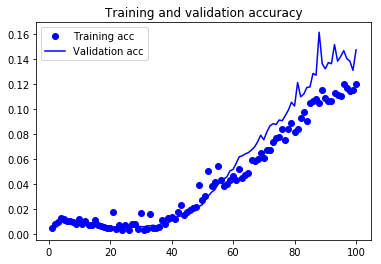

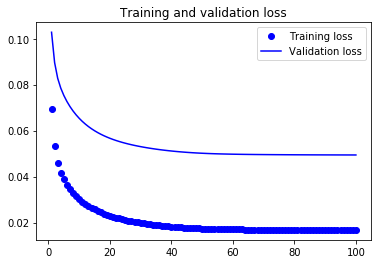

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
x_dataset_full = dataset['x']
y_dataset_full = dataset['y']

x_test = x_dataset_full[4000:5000]
y_test = y_dataset_full[4000:5000]

x_test, y_test = x_test.reshape(1000, 1280, 64), y_test.reshape(1000, 1280, 64)
print(x_test.shape, y_test.shape)

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)